In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data

In [2]:
data = pd.read_csv('Coffee.csv')

### Finding out the any missing values across columns

**We can see there are no missing values**

In [3]:
pd.isnull(data).sum()

No_of_Packet             0
Price_per_Packet         0
IDNo                     0
Brand                    0
Days_between_Purchase    0
Age                      0
SEC                      0
Income                   0
Household_Sz             0
Price_Conscious          0
Education                0
Loyalty                  0
dtype: int64

### Looking at some part of data

In [4]:
data.head()

,No_of_Packet,Price_per_Packet,IDNo,Brand,Days_between_Purchase,Age,SEC,Income,Household_Sz,Price_Conscious,Education,Loyalty
0,1,1,1,4,11,2,5,1,2,1,2,1
1,1,1,1,4,24,2,5,1,2,1,2,1
2,1,1,1,4,22,2,5,1,2,1,2,1
3,1,1,1,4,24,2,5,1,2,1,2,1
4,1,2,1,9,11,2,5,1,2,1,2,2


In [5]:
data['No_of_Packet'] =data['No_of_Packet'].astype('category').cat.rename_categories(['one packet',
                                                                            'two packets','three or more packets'])



### Note: We can see that all of our categorical features are numeric 
### Let's make it as categorical and assign proper categories to features, 
#### I am mapping categories form the word file given to us 

In [6]:
data['Price_per_Packet'] =data['Price_per_Packet'].astype('category').cat.rename_categories(['less than 6,50 DM',
                                                                            '6,50 DM to 8,50 DM','more than 8,50 DM'])

data['Brand'] =data['Brand'].astype('category').cat.rename_categories(['Jacobs Krönung',
                                                                       'Jacobs other',
                                                                       'Aldi',
                                                                       'Aldi other', 
                                                                       'Eduscho Gala', 
                                                                       'Eduscho other', 
                                                                       'Tchibo Feine Milde',
                                                                       'Tchibo other',
                                                                       'Andere Kaffeemarken'])

data['Age'] =data['Age'].astype('category').cat.rename_categories(['less than 24 years',
                                                                   '25 to 39 years',
                                                                   '40 to 49 years',
                                                                   '50 to 59 years',
                                                                   '60 years or more'])

data['SEC'] =data['SEC'].astype('category').cat.rename_categories(['upper class',
                                                                   'upper middle class',
                                                                   'middle class',
                                                                   'lower middle class',
                                                                   'lower class'])

data['Income'] =data['Income'].astype('category').cat.rename_categories(['less than 1499 DM',
                                                                         '1500 to 2499 DM',
                                                                         '2500 to 3499 DM',
                                                                         '3500 DM or more'])

data['Price_Conscious'] =data['Price_Conscious'].astype('category').cat.rename_categories(['not at all',
                                                                                           'a little',
                                                                                           'price-conscious',
                                                                                           'distinctly price-conscious'])
data['Education'] =data['Education'].astype('category').cat.rename_categories(['nine-year elementary school',
                                                                               'intermediate high school',
                                                                               'high-school / university'])
data['Loyalty'] =data['Loyalty'].astype('category').cat.rename_categories(['Loyal',
                                                                               'Not Loyal'])

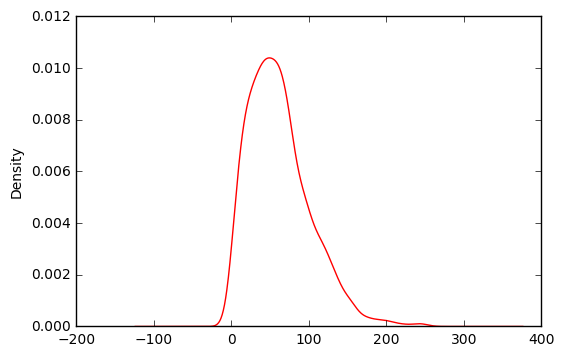

In [7]:
data['IDNo'].value_counts().plot(kind='kde',color='red',)

## Data points are right skewed and has positive kurtosis

In [8]:
cat=data.dtypes[data.dtypes=="category"].index

data[cat].describe()

,No_of_Packet,Price_per_Packet,Brand,Age,SEC,Income,Price_Conscious,Education,Loyalty
count,130986,130986,130986,130986,130986,130986,130986,130986,130986
unique,3,3,9,5,5,4,4,3,2
top,one packet,"6,50 DM to 8,50 DM",Andere Kaffeemarken,50 to 59 years,middle class,2500 to 3499 DM,not at all,high-school / university,Loyal
freq,105022,67374,35548,46601,49052,40557,75051,55237,75057


-------------------------------------------------
#### Q1. Which brands of coffee are more popular? Given a brand, are all variants equally preferred?

 <font color='green'>**We can see from below graph and summary statistics that *Andere Kaffeemarken* is more popular brand. All brands are not equally preffered.** </font>

-------------------------------------------------

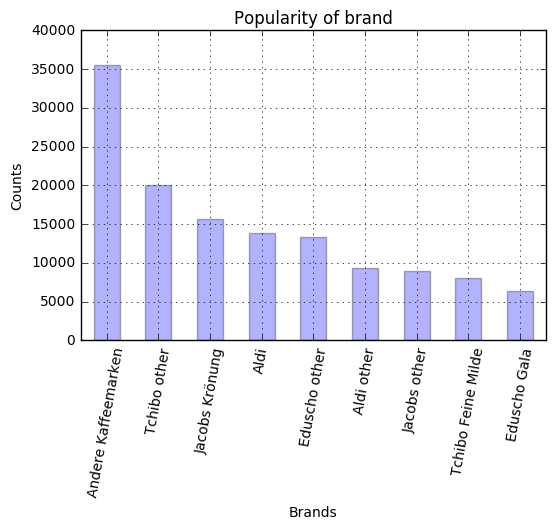

In [9]:
brand_plot = data['Brand'].value_counts().plot.bar(grid=True,alpha = 0.3,rot=80,
                                             title="Popularity of brand")
brand_plot.set_xlabel("Brands")
brand_plot.set_ylabel("Counts")

In [10]:
data['Brand'].value_counts()

Andere Kaffeemarken    35548
Tchibo other           20055
Jacobs Krönung         15662
Aldi                   13832
Eduscho other          13274
Aldi other              9370
Jacobs other            8872
Tchibo Feine Milde      8011
Eduscho Gala            6362
Name: Brand, dtype: int64

-------------------------------------------------
#### Q2. What are the prices of different brands of coffee?

<font color='green'>**We can see from below graph and summary statistics that:** </font>
* <font color='Blue'>*Aldi other* </font> is more cheaper brand. 
* <font color='Blue'>*Eduscho other* </font> is more costlier brand., because propotionally it is dominating over <font color='Blue'>*Tchibo other* </font>
* <font color='Blue'>*Andere Kaffeemarken* </font> is neither cheap nor costly because its most of the data points has price per packet = **6,50 DM to 8,50 DM**

<font color='Red'>**Inference:**<font color='Gray'> *Andere Kaffeemarken* is a more economical brand hance popular one

-------------------------------------------------

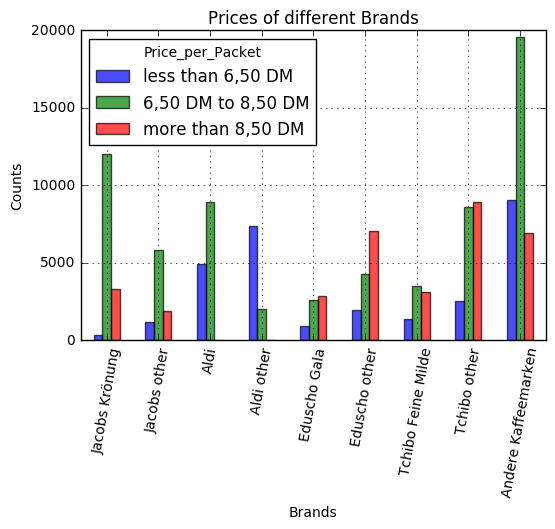

In [11]:
df2 = data.groupby(['Brand', 'Price_per_Packet'])['Brand'].count().unstack('Price_per_Packet')
price_plot = df2.plot(kind='bar', stacked=False, grid=True,alpha = 0.7,rot=80,
                                             title="Prices of different Brands")
price_plot.set_xlabel("Brands")
price_plot.set_ylabel("Counts")

In [12]:
pd.DataFrame(data.groupby(['Brand', 'Price_per_Packet'])['Brand'].count().unstack('Price_per_Packet'))

Price_per_Packet,"less than 6,50 DM","6,50 DM to 8,50 DM","more than 8,50 DM"
Brand,,,
Jacobs Krönung,345.0,12030.0,3287.0
Jacobs other,1163.0,5843.0,1866.0
Aldi,4915.0,8917.0,NaN
Aldi other,7359.0,2011.0,NaN
Eduscho Gala,912.0,2627.0,2823.0
Eduscho other,1922.0,4302.0,7050.0
Tchibo Feine Milde,1393.0,3496.0,3122.0
Tchibo other,2553.0,8568.0,8934.0
Andere Kaffeemarken,9075.0,19580.0,6893.0


-------------------------------------------------
#### Q3. How frequently does a household buy coffee? How many packets of coffee are bought at a time?

-------------------------------------------------

In [13]:
data['Days_between_Purchase'].describe()

count    130986.000000
mean         15.141725
std          20.581855
min           1.000000
25%           6.000000
50%           9.000000
75%          17.000000
max         741.000000
Name: Days_between_Purchase, dtype: float64

#### you can see from the above summary that max is 741 , min is 1, mean=15 Hence 
*Days_between_Purchase* has outliers, Lets find them & treat them   

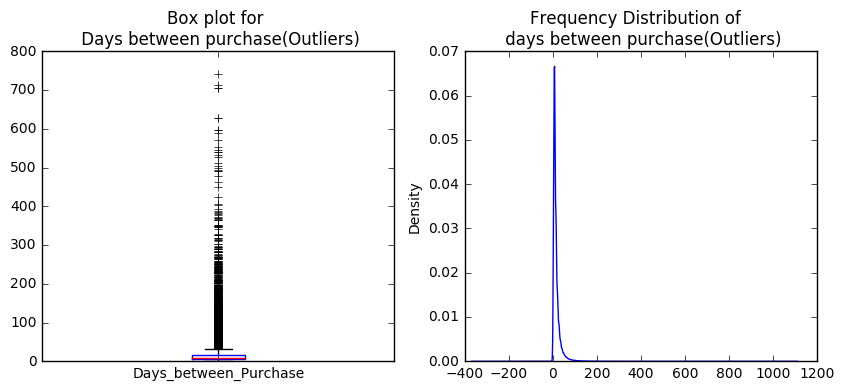

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
data['Days_between_Purchase'].plot(kind='box')
plt.title('Box plot for \n Days between purchase(Outliers)')
plt.subplot(122)
data['Days_between_Purchase'].plot(kind='kde')
plt.title('Frequency Distribution of  \n days between purchase(Outliers)')

In [15]:
q75, q25 = np.percentile(data['Days_between_Purchase'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

-10.5
33.5


#### We have outliers for max value not min value so lets forget about min value

In [16]:
print("Number of outliers:",data[data['Days_between_Purchase']>max].shape[0])

Number of outliers: 11299


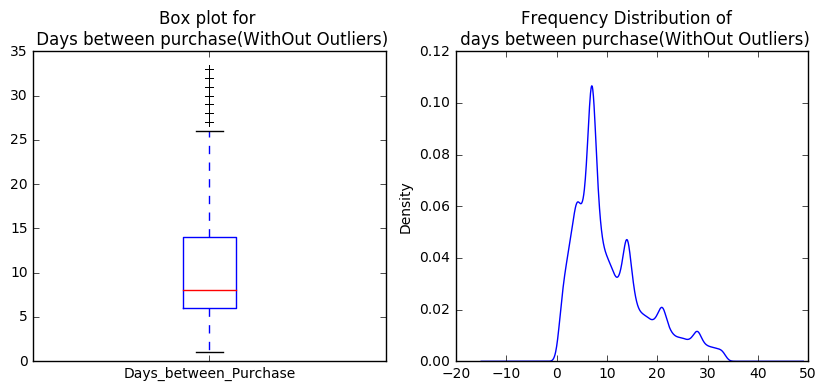

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(121)
data['Days_between_Purchase'][data.Days_between_Purchase<max].plot(kind='box')
plt.title('Box plot for \n Days between purchase(WithOut Outliers)')

plt.subplot(122)
data['Days_between_Purchase'][data.Days_between_Purchase<max].plot(kind='kde')
plt.title('Frequency Distribution of  \n days between purchase(WithOut Outliers)')

In [18]:
data['Days_between_Purchase'][data.Days_between_Purchase<max].describe()

count    119687.000000
mean         10.794639
std           7.264460
min           1.000000
25%           6.000000
50%           8.000000
75%          14.000000
max          33.000000
Name: Days_between_Purchase, dtype: float64

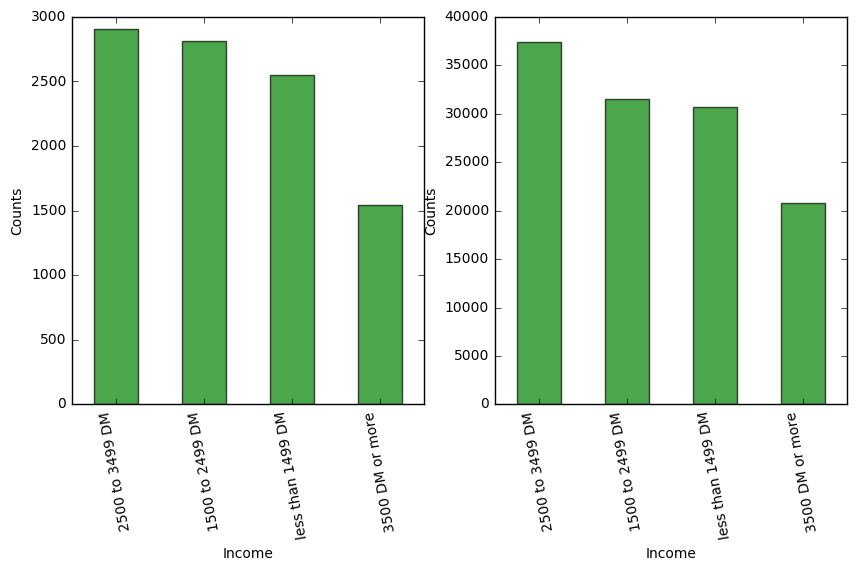

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(121)
data[data.Days_between_Purchase>35]['Income'].value_counts().plot(kind='bar',alpha=.7,color="Green",rot=100)
plt.ylabel('Counts')
plt.xlabel("Income")


plt.subplot(122)
data[data.Days_between_Purchase<35]['Income'].value_counts().plot(kind='bar',alpha=.7,color="Green",rot=100)
plt.ylabel('Counts')
plt.xlabel("Income")

#### Q4.a How frequently does a household buy coffee? 
Buying pattern is varying a lot but 30 % of the households are buying coffee within 5-7 days. followed 25% of households are buying within 9-13 days 

#### Q4.b How many packets of coffee are bought at a time?
Mostly households have purchased one packet of coffee

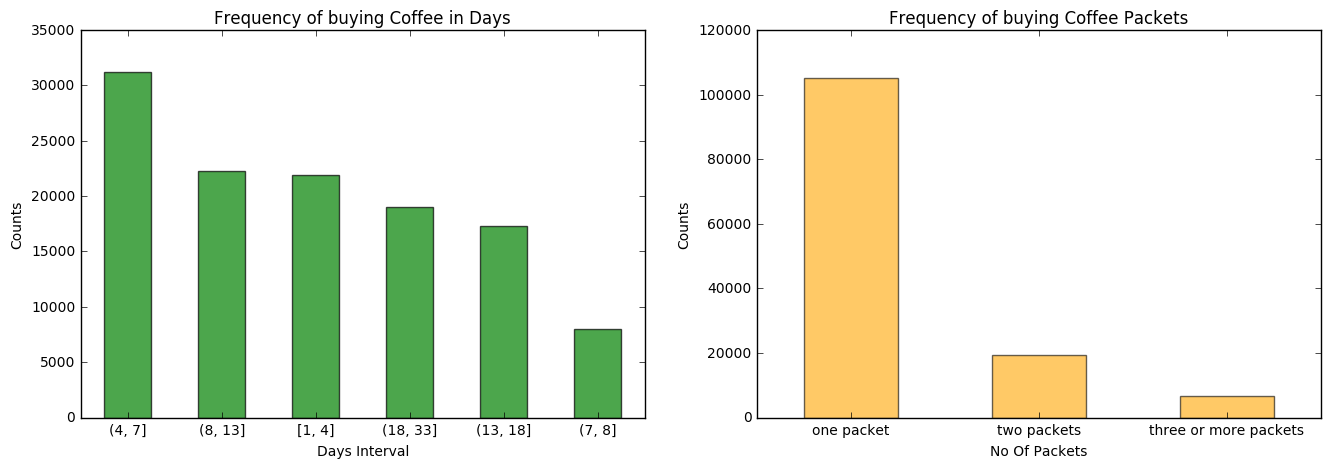

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(121)
pd.qcut(data['Days_between_Purchase'][data.Days_between_Purchase<max], 6).value_counts().plot(kind='bar',alpha=.7,color="Green",rot=360)
plt.ylabel('Counts')
plt.xlabel("Days Interval")
plt.title('Frequency of buying Coffee in Days')
plt.subplot(122)
data['No_of_Packet'].value_counts().plot(kind='bar',alpha=.6,color="Orange",rot=360)
plt.ylabel('Counts')
plt.xlabel("No Of Packets")
plt.title('Frequency of buying Coffee Packets')

-----------------------

### What are the factors that have an impact on a household’s coffee purchase pattern? Does brand preference depend on household size? Does purchase depend on a person’s income or education level?

#### Does brand preference depend on household size?
No, Famous and more economic is demanded more for all size of households

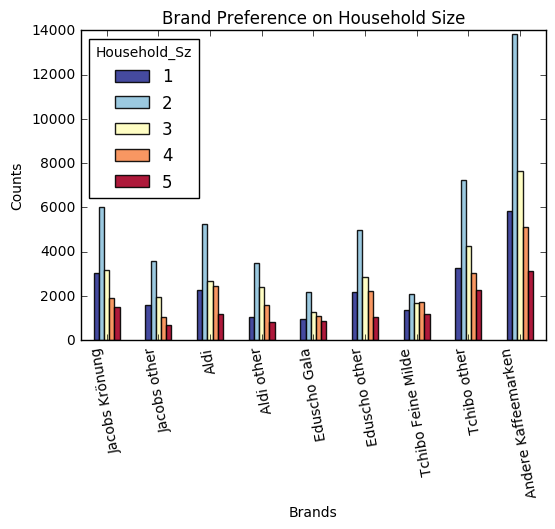

In [21]:
#plt.figure(figsize=(50,21))
df2 = data.groupby(['Brand', 'Household_Sz']).size().unstack('Household_Sz').sort_index()
df2.plot(kind='bar', stacked=False,alpha=.9,colormap='RdYlBu_r',rot=100, title='Brand Preference on Household Size')
plt.xlabel('Brands')
plt.ylabel('Counts')


####  Does purchase depend on a person’s income or education level?
Not much

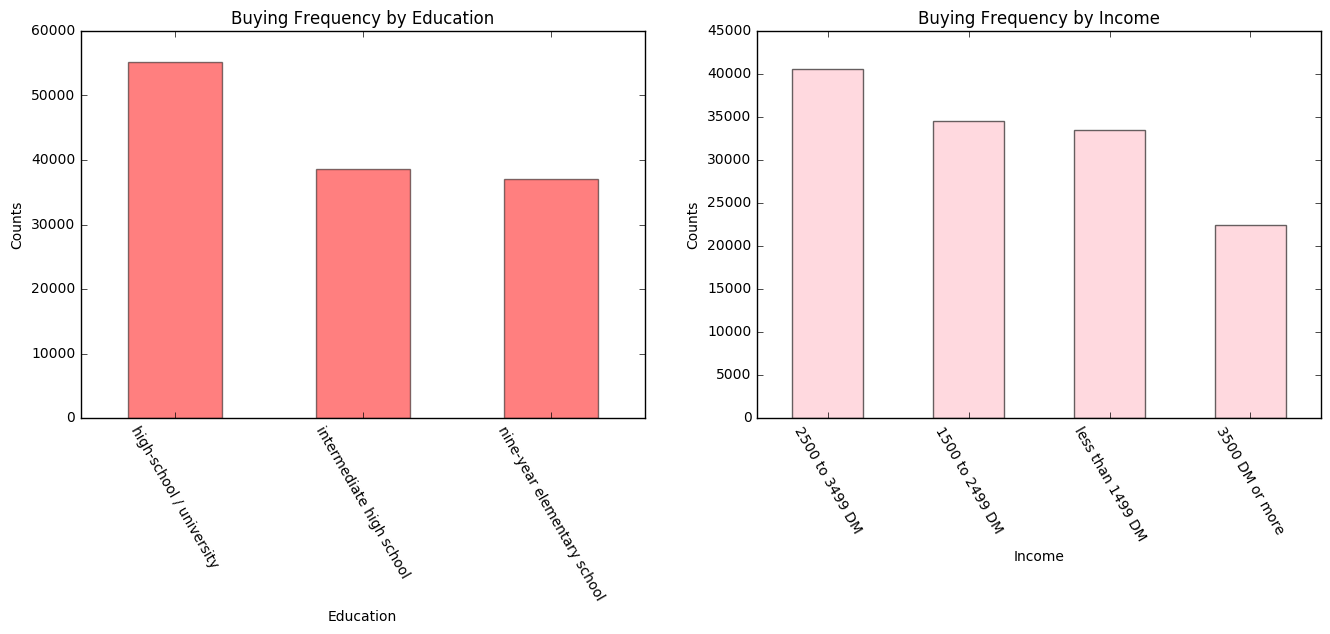

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(121)
data['Education'].value_counts().plot(kind='bar',alpha=0.5,color="Red",rot=300) #no
plt.xlabel("Education")
plt.ylabel("Counts")
plt.title("Buying Frequency by Education")
plt.subplot(122)
data['Income'].value_counts().plot(kind='bar',alpha=.6,color='pink',rot=300) #no 
plt.xlabel("Income")
plt.ylabel("Counts")
plt.title("Buying Frequency by Income")


#### What are the factors that have an impact on a household’s coffee purchase pattern?
** Impact is in Decreasing order**
* Age
* Price_Conscious
* SEC
* Loyalty
* Price_per_Packet

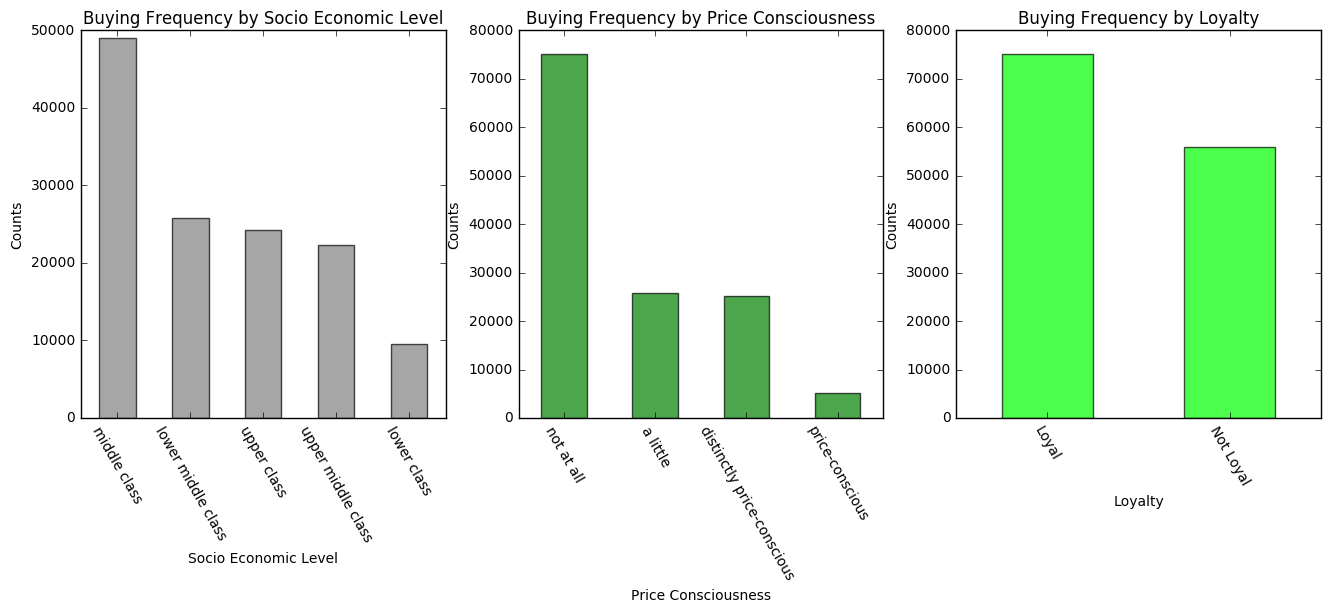

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(131)
data['SEC'].value_counts().plot(kind='bar', color='gray',alpha=.7,rot=300) #yes
plt.xlabel("Socio Economic Level")
plt.ylabel("Counts")
plt.title("Buying Frequency by Socio Economic Level")

plt.subplot(132)
data['Price_Conscious'].value_counts().plot(kind='bar', color='Green',alpha=.7,rot=300) #yes
plt.xlabel("Price Consciousness")
plt.ylabel("Counts")
plt.title("Buying Frequency by Price Consciousness")


plt.subplot(133)
data['Loyalty'].value_counts().plot(kind='bar',color='Lime',alpha=.7,rot=300) #yes
plt.xlabel("Loyalty")
plt.ylabel("Counts")
plt.title("Buying Frequency by Loyalty")

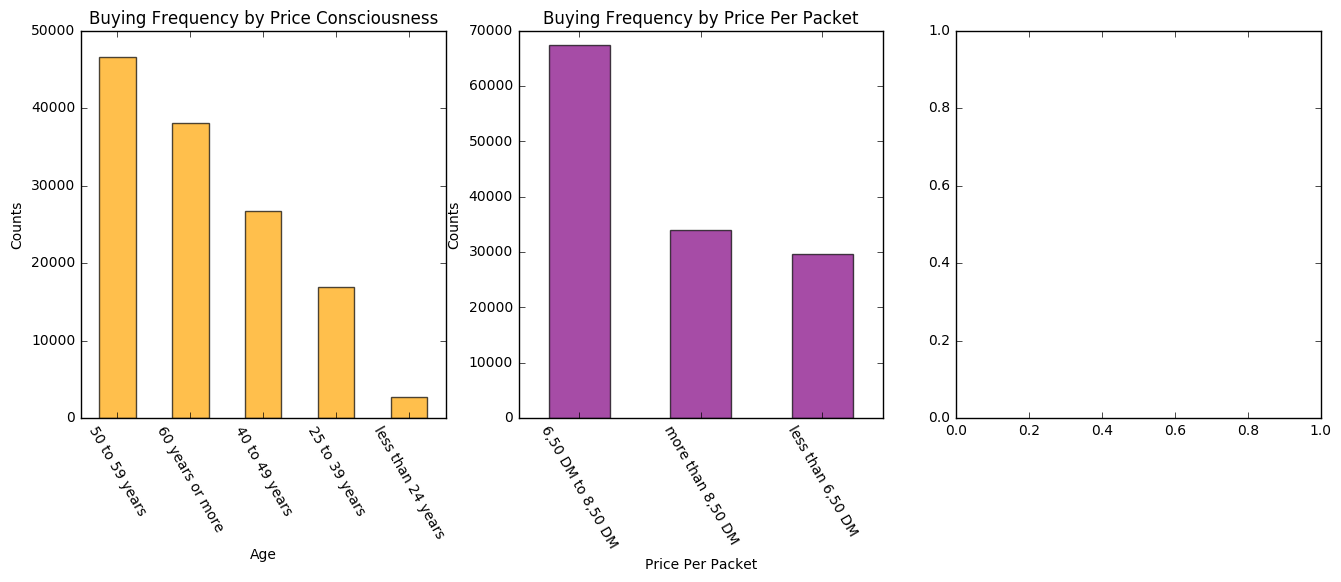

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(131)
data['Age'].value_counts().plot(kind='bar', color='Orange',alpha=.7,rot=300) #yes
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Buying Frequency by Price Consciousness")

plt.subplot(132)
data['Price_per_Packet'].value_counts().plot(kind='bar', color='Purple',alpha=.7,rot=300) #yes
plt.xlabel("Price Per Packet")
plt.ylabel("Counts")
plt.title("Buying Frequency by Price Per Packet")

plt.subplot(133)

### Are there any variables/columns you think will be eventually irrelevant for the study? Why?
* Identification number of household, its a unique number assigned to a house hold

### Can you possibly identify some outliers?
* As we saw previously, Days_between_Purchase has outliers

### For better analysis do you think a few brand variants needs to be clubbed together?
yes, it will be usefull for coffee makers for better decision making

### Can you do some probability estimates- Say what is the probability that a randomly chosen household belongs to the top two social levels? What is the probability that households belonging to the top two social levels buy more expensive coffee?

0.34,.89

### You are also expected to identify a few (between 2 and 4) relevant business questions, aligning data against each question or pointing out if any relevant data is not available. 

### How does loyalty play a part in determining coffee purchasing patterns? Can the group take a shot at analysing how loyalty is reflected in various socio-economic classes and/or educational backgrounds?

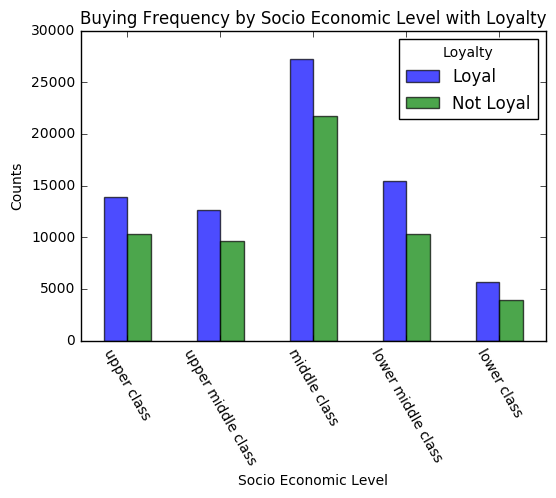

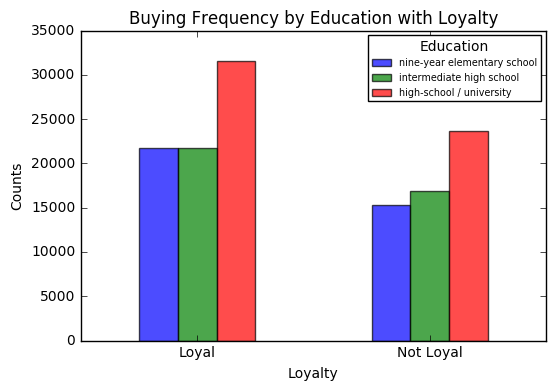

In [25]:
data.groupby(['Loyalty','SEC']).size().unstack('Loyalty').plot(kind='bar', stacked=False,alpha=.7,rot=300)
plt.xlabel("Socio Economic Level")
plt.ylabel("Counts")
plt.title("Buying Frequency by Socio Economic Level with Loyalty")


data.groupby(['Loyalty','Education']).count().unstack('Education')['No_of_Packet'].plot(kind='bar', stacked=False,alpha=.7,rot=360)
plt.legend(loc=1, fontsize = 'x-small',title='Education')
plt.ylabel("Counts")
plt.title("Buying Frequency by Education with Loyalty")

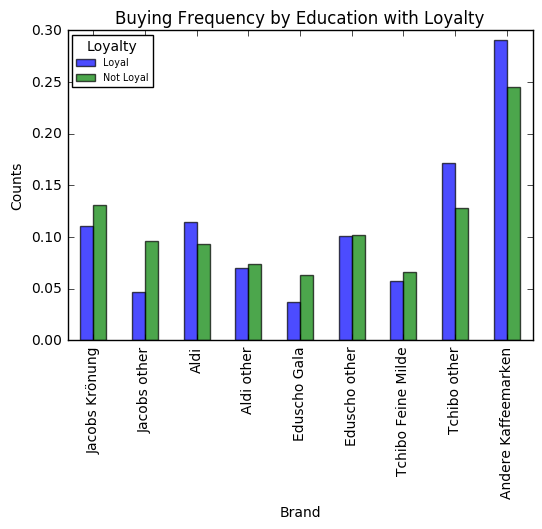

In [26]:
data.groupby(['Loyalty','Brand']).count().unstack('Brand')['No_of_Packet'].T.apply(lambda x: x / float(x.sum())).plot(kind='bar', stacked=False,alpha=.7)
plt.legend(bbox_to_anchor=(2,1))
plt.legend(loc=2, fontsize = 'x-small',title='Loyalty')
plt.ylabel("Counts")
plt.title("Buying Frequency by Education with Loyalty")

In [27]:
data.groupby(['Loyalty','Education']).count().unstack('Loyalty')['No_of_Packet'].apply(lambda x: x / float(x.sum()))

Loyalty,Loyal,Not Loyal
Education,,
nine-year elementary school,0.290299,0.273901
intermediate high school,0.289633,0.302205
high-school / university,0.420067,0.423895


In [28]:
data.dtypes

No_of_Packet             category
Price_per_Packet         category
IDNo                        int64
Brand                    category
Days_between_Purchase       int64
Age                      category
SEC                      category
Income                   category
Household_Sz                int64
Price_Conscious          category
Education                category
Loyalty                  category
dtype: object

# Lets Model the Data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [34]:
# Remove all the data points having days between purchase 
dataForModeling = data[data.Days_between_Purchase>35]

In [35]:
features =  ['No_of_Packet','Price_per_Packet','Days_between_Purchase', 
            'Age','SEC','Income','Household_Sz',
            'Price_Conscious','Education','Loyalty','Brand']  

In [ ]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]